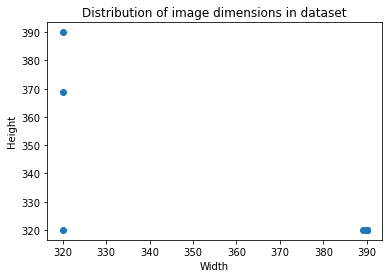

In [1]:
%load_ext autoreload
%autoreload 1

# Create scatter plot of all image sizes
# https://gitlab.tubit.tu-berlin.de/fabihier/ML_MIP/issues/3

import src_loader
import datasets as ds
import matplotlib.pyplot as plt

dataset_path = '../dataset/CheXpert-v1.0-mini'
# Get sizes
_, _, _, _, sizes = ds.determine_sizes(dataset_path, [f'{dataset_path}/train.csv', f'{dataset_path}/valid.csv'])

plt.scatter(sizes[:,0], sizes[:,1])
plt.title("Distribution of image dimensions in dataset")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

[]

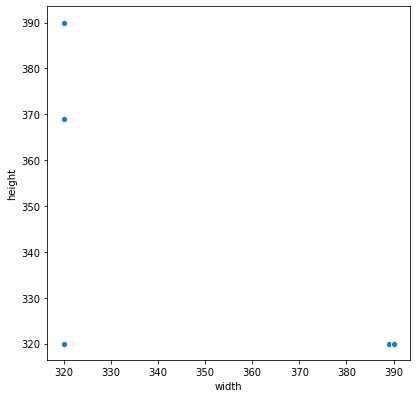

In [2]:
# Source: https://seaborn.pydata.org/examples/different_scatter_variables.html

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="whitegrid")

# dataset_path = '../dataset/CheXpert-v1.0-mini'
# Get sizes
_, _, _, _, sizes = ds.determine_sizes(dataset_path, [f'{dataset_path}/train.csv', f'{dataset_path}/valid.csv'])

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))

# Convert array to seaborn data frame
df = pd.DataFrame(sizes, columns=['width','height'])
scatter_plot = sns.scatterplot(x='width', y='height', data=df)
scatter_plot.plot()

In [3]:
import pandas as pd
# dataset_path = '../dataset/CheXpert-v1.0-mini'

labels = pd.read_csv(f'{dataset_path}/valid.csv')
labels.Path.values

array(['CheXpert-v1.0-mini/valid/patient64541/study1/view1_frontal.jpg',
       'CheXpert-v1.0-mini/valid/patient64542/study1/view1_frontal.jpg',
       'CheXpert-v1.0-mini/valid/patient64542/study1/view2_lateral.jpg',
       'CheXpert-v1.0-mini/valid/patient64543/study1/view1_frontal.jpg'],
      dtype=object)

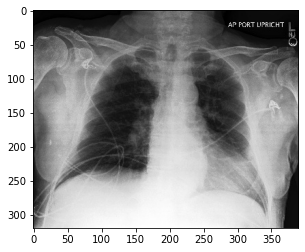

In [4]:
import src_loader
import image_processing as ip
import os

# dataset_path = '../dataset/CheXpert-v1.0-mini'
patient = 'valid/patient64541/study1/view1_frontal.jpg'
patient = os.path.join(dataset_path, patient)

ip.load_show_img(patient)

In [5]:
import src_loader
import custom_transformations as custom_transforms

from PIL import Image
image = Image.open(patient)

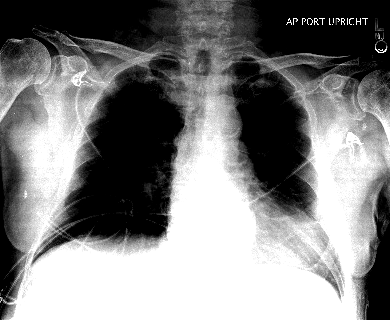

In [6]:
contrast_transform = custom_transforms.ContrastTransform(contrast_factor=2)
contrast_transform(image)

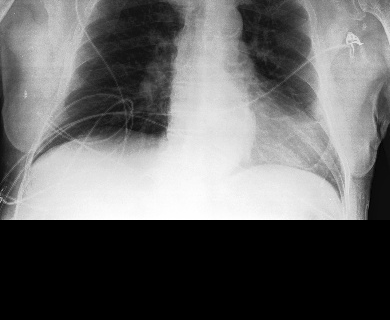

In [7]:
translate_transform = custom_transforms.TranslateTransform(translate=(0,-100))
translate_transform(image)

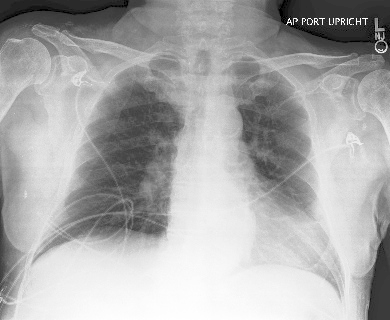

In [8]:
gamma_transform = custom_transforms.GammaTransform(gamma=0.5)
gamma_transform(image)

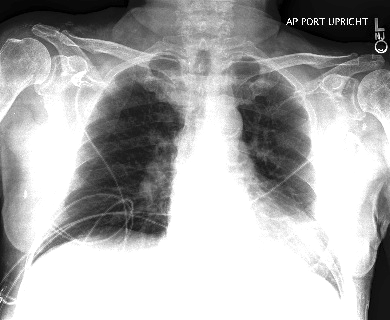

In [9]:
brightness_transform = custom_transforms.BrightnessTransform(brightness_factor=1.5)
brightness_transform(image)

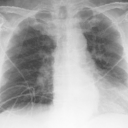

In [10]:
from torchvision import transforms

x, y = image.size

x = int(x*0.90)
y = int(y*0.90)

STACK = transforms.Compose(
    [
        transforms.RandomRotation(8),
        transforms.CenterCrop((x,y)),
        transforms.Resize(150),
        transforms.RandomCrop(128, padding=-11),
        custom_transforms.GammaTransform(gamma=0.5),
        # transforms.ToTensor()
    ]
)

STACK(image)